In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [6]:
# merge data
pyber_data_df = pd.merge(ride_data_df,city_data_df,how = "left", on=['city','city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# ride_data_df.set_index('city')

ride_fare_sr = ride_data_df.groupby('city')['fare'].mean()
ride_count_sr = ride_data_df.groupby('city')['ride_id'].count()

city_ride_sharing_df = pd.DataFrame(
    {'Average Fares($)' : ride_fare_sr,
    'Total Number of Rides(per City)': ride_count_sr} )

pyber_ride_sharing_df = pd.merge(city_ride_sharing_df, city_data_df[['city','driver_count','type']],how ='left',on =['city','city'])

pyber_ride_sharing_df.head()


,city,Average Fares($),Total Number of Rides(per City),driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [8]:
# find a fast way to insert a relative column -Manually
pyber_ride_sharing_df['color'] = pyber_ride_sharing_df['type'].map({'Urban': 'coral', 'Suburban': 'skyblue','Rural':'gold'})
pyber_ride_sharing_df.head()

,city,Average Fares($),Total Number of Rides(per City),driver_count,type,color
0,Amandaburgh,24.641667,18,12,Urban,coral
1,Barajasview,25.332273,22,26,Urban,coral
2,Barronchester,36.422500,16,11,Suburban,skyblue
3,Bethanyland,32.956111,18,22,Suburban,skyblue
4,Bradshawfurt,40.064000,10,7,Rural,gold


In [9]:
# for color option 1 -- no use
city_type_df = pd.DataFrame({'type':city_data_df['type'].unique(),'color':['coral','skyblue','gold']}).set_index('type')
city_type_df

,color
type,
Urban,coral
Suburban,skyblue
Rural,gold


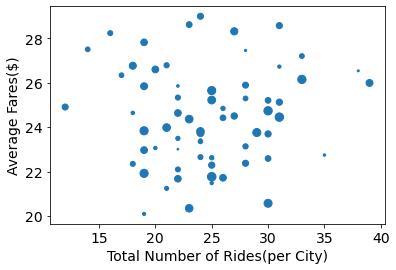

<Figure size 1440x1152 with 0 Axes>

In [52]:
#for city_type in city_type_df.index:
temp_df = pyber_ride_sharing_df.loc[pyber_ride_sharing_df['type']=='Urban']
temp_df.plot(kind = 'scatter',
             x = "Total Number of Rides(per City)",
            y = "Average Fares($)",
            s = temp_df['driver_count'])
plt.figure(figsize = (20,16))
plt.savefig("analysis/Fig12.png")

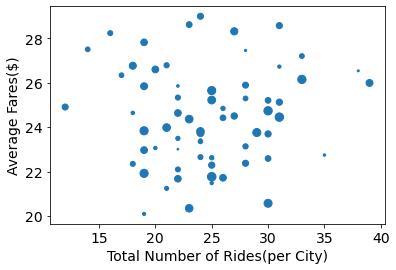

<Figure size 720x432 with 0 Axes>

In [51]:
#for city_type in city_type_df.index:
temp_df = pyber_ride_sharing_df.loc[pyber_ride_sharing_df['type']=='Urban']
temp_df.plot(kind = 'scatter',
             x = "Total Number of Rides(per City)",
            y = "Average Fares($)",
            s = temp_df['driver_count'])
plt.figure(figsize = (10,6))
plt.savefig("analysis/Fig11.png")

<function matplotlib.pyplot.legend(*args, **kwargs)>

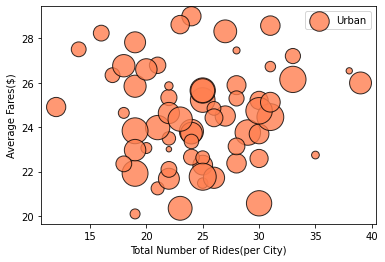

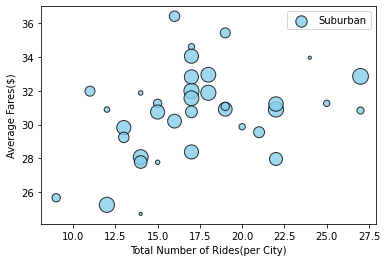

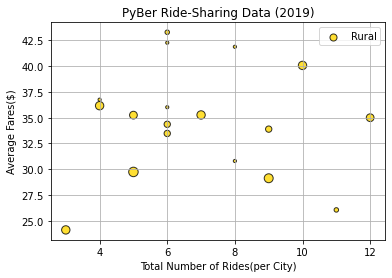

In [11]:
# tried to use loop for different legend()

# fail to conbine in one plot

for city_type in city_type_df.index:
    temp_df = pyber_ride_sharing_df.loc[pyber_ride_sharing_df['type']==city_type]
    ax=temp_df.plot(kind = 'scatter',
        x = "Total Number of Rides(per City)",
        y = "Average Fares($)",
        s = temp_df.iloc[:,3]*10,
        c = city_type_df.loc[city_type,'color'],
        label = city_type,
        edgecolor="black", linewidths=1,alpha=0.8)
    
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend

<AxesSubplot:title={'center':'PyBer Ride-Sharing Data (2019)'}, xlabel='Total Number of Rides(per City)', ylabel='Average Fares($)'>

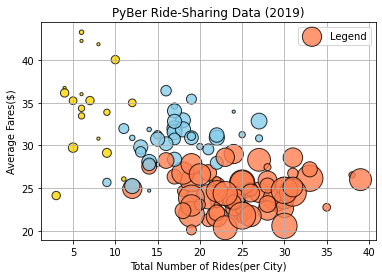

In [12]:
pyber_ride_sharing_df.plot.scatter(
    x = "Total Number of Rides(per City)",
    y = "Average Fares($)",
    s = pyber_ride_sharing_df.iloc[:,3]*10,
    c = pyber_ride_sharing_df['color'],
    label = "Legend",
    edgecolor="black", linewidths=1,alpha=0.8,
    title = "PyBer Ride-Sharing Data (2019)",
    grid = True)


In [13]:
# 5.3.1
# Create the city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [14]:
# 5.3.2
# Get the number of rides for cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [15]:
# 5.3.3
# Get average fare for each city in the cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [16]:
# 5.3.4
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

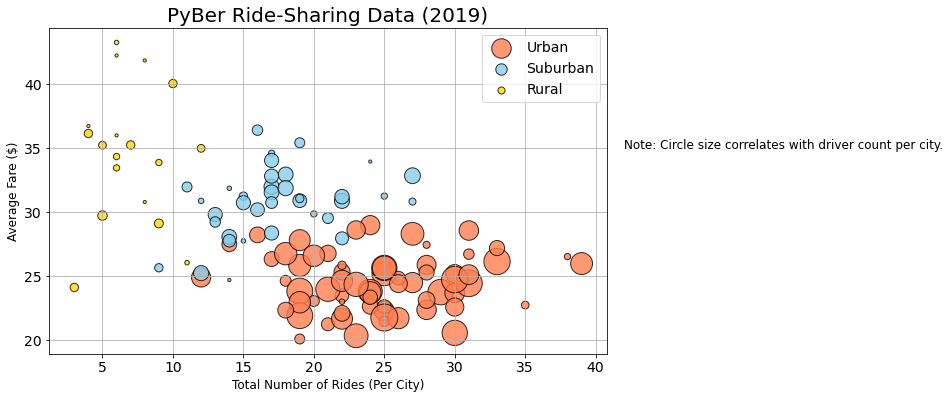

In [54]:
#5.3.6 
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Add the legend.
plt.legend()

# Create a legend
# lgnd = plt.legend(fontsize="12", mode="Expanded",
#          scatterpoints=1, loc="best", title="City Types")
# lgnd.legendHandles[0]._sizes = [75]
# lgnd.legendHandles[1]._sizes = [75]
# lgnd.legendHandles[2]._sizes = [75]
# lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()
# Save the figure.
# plt.savefig("analysis/Fig1.png")

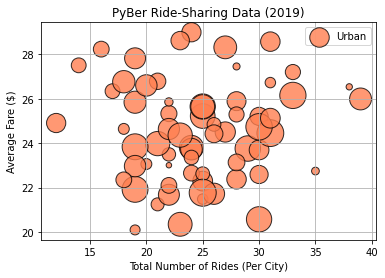

In [18]:
#5.3.6 

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [19]:
city_type_ar = city_data_df['type'].unique()
city_type_ar

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [20]:
#  5.4.1
# Get summary statistics.
urban_cities_df.describe()
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [21]:
suburban_cities_df.describe()
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [22]:
rural_cities_df.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [23]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [24]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [25]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [26]:
for i in [24,39,47,72]:
    print(i*4)

96
156
188
288


In [27]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [28]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [29]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [30]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [31]:
# 5.4.2 Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [32]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [33]:
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df['fare']

In [34]:
mean_suburban_fares = np.mean(suburban_fares)
mean_suburban_fares

30.97012800000002

In [35]:
mean_rural_fares = np.mean(rural_fares)
mean_rural_fares

34.623440000000016

In [36]:
# 5.4.3 Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [37]:
# Calculate the measures of central tendency for the average DRIVER COUNT for the urban cities.
mean_urban_D = np.mean(urban_drivers)
print(f"The mean fare price for urban trips is ${mean_urban_D:.2f}.")

median_urban_D = np.median(urban_drivers)
print(f"The median fare price for urban trips is ${median_urban_D:.2f}.")

mode_urban_D = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_D}.")

The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $37.00.
The mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [38]:
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
mean_suburban_D = np.mean(suburban_drivers)
mean_suburban_D

13.712

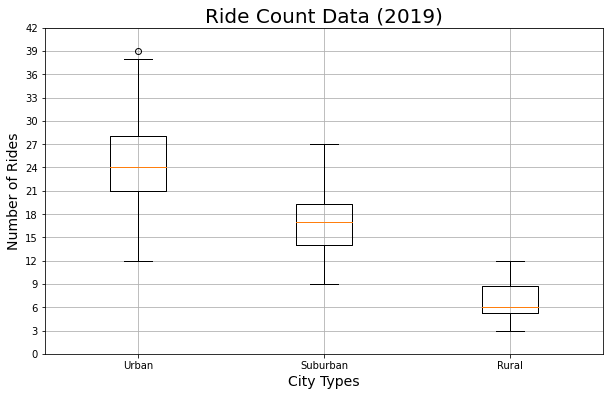

In [39]:
# 5.4.4 Create count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [40]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


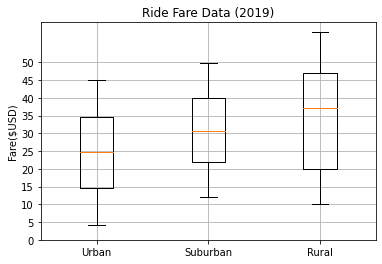

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

<Figure size 432x288 with 0 Axes>

In [41]:
# Create box-and-whisker plots for the fare data.
x_labels = ["Urban", "Suburban","Rural"]
fig, ax = plt.subplots()
ax.boxplot([urban_fares,suburban_fares,rural_fares],labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig3.png")
print("Summary Statistics")
urban_fares.describe()

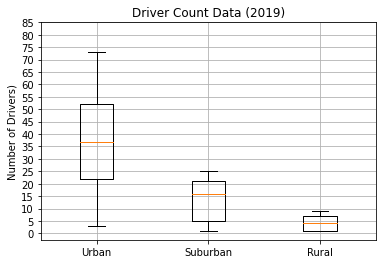

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

<Figure size 432x288 with 0 Axes>

In [42]:
# Create the box-and-whisker plots for the driver count data.
x_labels = ["Urban", "Suburban","Rural"]
fig, ax = plt.subplots()
ax.boxplot([urban_drivers,suburban_drivers,rural_drivers],labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig4.png")
print("Summary Statistics")
urban_drivers.describe()

In [43]:
# 5.5.1 Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

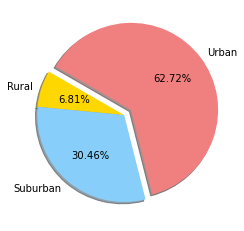

In [44]:
# Build the percentage of fares by city type pie chart.              ----simple easy way
plt.pie(sum_fares_by_type,autopct='%.2f%%', labels=sum_fares_by_type.index,
       colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],shadow=True, startangle=150)
plt.show()

In [45]:
# Get the sum of all the fares.              ---------not necessary for Pie Chart!
total_fares = pyber_data_df["fare"].sum()

# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares


# OR Calculate the percentage of fare for each city type.
# type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

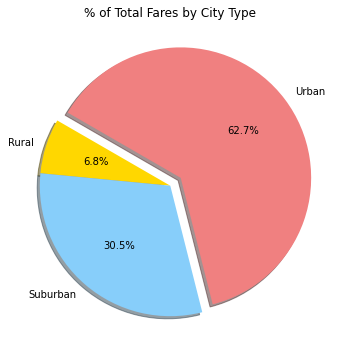

In [46]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

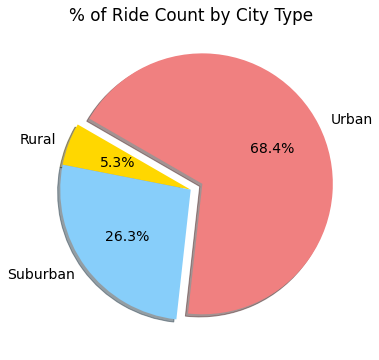

In [47]:
# 5.6

ride_count_groups=pyber_data_df.groupby(["type"]).count()["ride_id"]
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_count_groups,
    labels=ride_count_groups.index,
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Ride Count by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

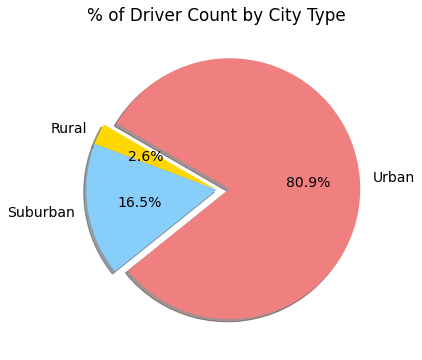

In [48]:
# 5.7

driver_count_groups=city_data_df.groupby(["type"]).sum()["driver_count"] 
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_count_groups,
    labels=driver_count_groups.index,
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Driver Count by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()